In [1]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
X, y = wine.data, wine.target
X.shape, y.shape, set(y)

((178, 13), (178,), {0, 1, 2})

In [3]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
X[:,1][1]

1.78

In [ ]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        plt.xlabel(f"{i}: {wine.feature_names[i]}")
        plt.ylabel(f"{j}: {wine.feature_names[j]}")
        print("grafico:", i)
        for k in set(y):
          plt.plot(X[:,i][y==k], X[:,j][y==k], "o", label=f"{wine.target_names[k]}")
        plt.legend()
        plt.show()



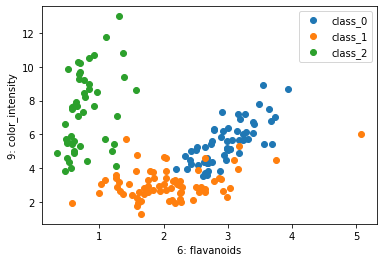

In [11]:
import matplotlib.pyplot as plt
i,j = 6,9
plt.xlabel(f"{i}: {wine.feature_names[i]}")
plt.ylabel(f"{j}: {wine.feature_names[j]}")
for k in set(y):
    plt.plot(X[:,i][y==k], X[:,j][y==k], "o", label=f"{wine.target_names[k]}")
plt.legend()
plt.show()

In [12]:
X69 = X[:, [6,9]]
X69.shape

(178, 2)

In [13]:
import numpy as np
class vizinho():
    def fit(self, X, y):
        self.X = X
        self.y = y
    def distancia(self, X):
        diferenca = self.X - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz
    def predict(self, X):
        ypred = np.empty((X.shape[0],)) #empty - cria um vetor sem inicializar as entradas
        for i in range(X.shape[0]):
            distancias = self.distancia(X[i])
            vizinho = np.argmin(distancias) #argmin - determina o argumento do menor valor
            ypred[i] = self.y[vizinho]
        return ypred


In [14]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X69, y)
ypred = modelo.predict(X69)
acuracia = accuracy_score(y, ypred)
acuracia

1.0

In [ ]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X, y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
acuracia

In [15]:
ntreino = int(len(y)*0.7)
X_treino, X_teste = X[:ntreino], X[ntreino:]
y_treino, y_teste = y[:ntreino], y[ntreino:]
X_treino.shape, X_teste.shape

((124, 13), (54, 13))

In [ ]:
idx = list(range(len(y)))

X_tr = X[idx[:ntr]]
X_te = X[idx[n_tr:]]

In [16]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia

0.1111111111111111

In [ ]:
print(y)
print(y_treino)
print(y_teste)

In [ ]:
from sklearn.model_selection import train_test_split
## Metodo: hold out (treino teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42) #random_state: mesma separação de treino e teste

from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia

validação alinhada e validação cruzada

data shift 

LSTM - rede recorrente

In [ ]:
import matplotlib.pyplot as plt
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new = scaler.fit_transform(X)

import matplotlib.pyplot as plt
plt.bar(list(range(X_new.shape[1])), np.mean(X_new, axis=0))
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
import numpy as np

modelo = LogisticRegression()
scores = cross_validate(modelo, X, y)
sempad = np.mean(scores['test_score'])
print(f"Sem padronização: {sempad}")

In [ ]:
scores = cross_validate(modelo, X_new, y)
compad = np.mean(scores['test_score'])
print(f"Com padronização: {compad}")

In [ ]:
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("padronização", scaler),
    ("knn", LogisticRegression())
])
scores = cross_validate(modelo, X_new, y)
aninha = np.mean(scores['test_score'])
print(f"Com padronização aninhada: {aninha}")

In [ ]:
import matplotlib.pyplot as plt
colunas = ['sem scaler', 'com scaler', 'aninhado']
plt.bar(colunas, [sempad, compad, aninha])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.bar(colunas, np.array([sempad, compad, aninha])-0.95, bottom=0.95)
plt.show()